# SCENIC pathway in R
* completing in R as head issues with pySCENIC

## SCENIC Pipeline involves 3 steps:
1. Infer co-expression network (```GRNBoost```)
2. analysise TF binding motifs (```RcisTarget```)
3. identify cells with active gene sets (gene-network) in scRNAseq data (```AUCell```)

https://htmlpreview.github.io/?https://github.com/aertslab/SCENIC/blob/master/inst/doc/SCENIC_Setup.html

https://htmlpreview.github.io/?https://github.com/aertslab/SCENIC/blob/master/inst/doc/SCENIC_Running.html

### Build the gene regulatpry network (GRN)
1. Idenitfy potential targets for each TF based on co-expression 
* Filtering the expression matrix and running GENIE3/GRNBoost.
* Formatting the targets from GENIE3/GRNBoost into co-expression modules.

2. Select potential direct-binding targets (regulons) based on DNA-motif analysis (RcisTarget: TF motif analysis)

### Identify cell states and their regulators:

3. Analyzing the network activity in each individual cell (AUCell)
* Scoring regulons in the cells (calculate AUC)
* Optional: Convert the network activity into ON/OFF (binary activity matrix)

4. Identify stable cell states based on their gene regulatory network activity (cell clustering) and exploring the results

# Import data (DC only)

In [1]:
# set wd
setwd('/scratch/user/s4436039/scdata/SCENIC-R')
getwd()

[1] "/scratch/user/s4436039/scdata/SCENIC-R"

In [2]:
library(Seurat)
library(sceasy)
library(reticulate)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: reticulate



In [4]:
h5ad_path = "/scratch/user/s4436039/scdata/Python_Integration_Sep/NRclean_clustered2_DC.h5ad"

In [6]:
sceasy::convertFormat(h5ad_path, from="anndata", to="seurat",
                        outFile='NRclean_clustered2_DC.rds')

X -> counts



An object of class Seurat 
1268 features across 30241 samples within 1 assay 
Active assay: RNA (1268 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [7]:
data = readRDS('NRclean_clustered2_DC.rds')

In [9]:
head(data@meta.data)

,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,⋯,DC3_up_DC2,mregDC_sig,cDC1_mregDC,cDC2_mregDC,NR_annotations,NR_annotations_simple,sample_type_major2,cancer_with_H,cancer_broadest,CytoTRACE_DC_Predicted_order
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
GSE215120_AM1_AAATGCCCAGAGCCAA-1,17143,2659,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.224990,skin,primary tumour,Acral Melanoma,⋯,0.124529679,0.4272291,0.2594598,0.4894216,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.3545500
GSE215120_AM1_ACACTGATCCACTGGG-1,18333,2845,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.063656,skin,primary tumour,Acral Melanoma,⋯,0.226950316,0.6178830,0.2816962,0.6207678,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.3704625
GSE215120_AM1_ACAGCCGCAAACCTAC-1,10581,2182,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.050846,skin,primary tumour,Acral Melanoma,⋯,-0.007039869,0.1021379,0.2901960,0.3789101,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.5524615
GSE215120_AM1_ACCAGTAAGACTGGGT-1,8015,1488,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.033687,skin,primary tumour,Acral Melanoma,⋯,0.021664478,0.3235164,0.4469735,0.2238997,cDC1,cDC1,primary tumour,Acral Melanoma,MEL,0.4400796
GSE215120_AM1_ACGTCAACAAGGACTG-1,25642,4010,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,2.835192,skin,primary tumour,Acral Melanoma,⋯,-0.066700829,0.2114101,0.3873203,0.3090685,cDC1,cDC1,primary tumour,Acral Melanoma,MEL,0.7473894
GSE215120_AM1_ACGTCAATCCGCATCT-1,9833,2074,tumour,Acral Melanoma,AM1,GSE215120_Acral_MEL_AM1,1.311909,skin,primary tumour,Acral Melanoma,⋯,0.050473049,-0.1005454,0.1987381,0.4620914,cDC2,cDC2,primary tumour,Acral Melanoma,MEL,0.7662854


# Generate loom data for input in to SCENIC: 

In [31]:
library(SCopeLoomR)


Attaching package: ‘SCopeLoomR’


The following object is masked from ‘package:base’:

    flush




In [10]:
# make object with expression data
expression_data <- GetAssayData(data)
expression_data <- as.data.frame(as.matrix(expression_data))

In [11]:
head(expression_data)

,GSE215120_AM1_AAATGCCCAGAGCCAA-1,GSE215120_AM1_ACACTGATCCACTGGG-1,GSE215120_AM1_ACAGCCGCAAACCTAC-1,GSE215120_AM1_ACCAGTAAGACTGGGT-1,GSE215120_AM1_ACGTCAACAAGGACTG-1,GSE215120_AM1_ACGTCAATCCGCATCT-1,GSE215120_AM1_ACTGAGTCAGGCTGAA-1,GSE215120_AM1_ACTGTCCGTCTCTTAT-1,GSE215120_AM1_ACTTGTTTCTGAAAGA-1,GSE215120_AM1_AGAGCTTGTACAGTTC-1,⋯,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CGGGCATTCTTCTGTA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTACGGGGTGATCGTT,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTCATGCTCGTTAGAC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_CTTGATTAGCAGGTCA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GAGGGATCAAGCGCTC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TACCGAACAAACCGGA,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TCACGCTTCCGTCACT,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGCAGTAGTGTTGCCG,GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGTGAGTTCGGAAACG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HES4,2.10042956,3.45275483,4.21835863,-0.32335678,-0.39281808,-0.33100814,-0.30674000,-0.32088230,-0.31202074,-0.35627685,⋯,-0.30352896,-0.23608103,-0.29583627,-0.23550534,-0.22692363,-0.29928685,-0.29836658,-0.29131687,-0.29165102,-0.27111413
ISG15,-0.38093311,0.94410567,1.47187286,0.22832942,0.61383005,0.04630722,-0.98469539,-0.36453844,-0.35181972,-0.22300907,⋯,-0.02546914,0.93126918,-0.22630387,-0.57662320,0.73137761,0.48386717,0.87684225,-0.90866133,-0.89511735,-0.78094494
TNFRSF18,2.62804255,5.65023741,-0.12298977,-0.12573380,-0.10602046,-0.12463605,-0.12504777,-0.12586297,-0.12499708,-0.11507615,⋯,-0.12445032,-0.11325698,-0.12014261,-0.11343195,-0.11219064,-0.12068373,-0.13158176,-0.12649585,-0.12192309,-0.12320520
TNFRSF4,5.07010836,4.06395330,-0.17561133,-0.16576986,-0.23441743,-0.18071631,5.60853347,-0.17404046,-0.16839594,-0.20787494,⋯,-0.15706906,-0.15253007,-0.16634682,-0.14588155,-0.15756689,-0.17748924,-0.14318806,-0.17085078,-0.17747921,-0.15387784
ATAD3C,-0.08303087,-0.08459465,-0.07388701,-0.07005439,-0.09592259,-0.07367120,-0.06989837,-0.07096651,-0.07052552,-0.08444572,⋯,-0.06624626,-0.06325107,-0.07004899,-0.06208992,-0.06473342,-0.07187153,-0.06170866,-0.06710324,-0.06972128,-0.06360366
PRKCZ,-0.08844925,-0.08867859,-0.08567117,-0.08457820,-0.09298853,-0.08465160,-0.08381085,-0.08398513,-0.08409993,-0.08863072,⋯,-0.08473521,-0.08654890,-0.08558704,-0.08678614,-0.08616186,-0.08495224,-0.08196928,-0.08244721,-0.08414816,-0.08378394


In [21]:
#make data frame with cell annotations
metadata <- data@meta.data
cellInfo <- data.frame(NR_annotations_simple = metadata$NR_annotations_simple)
rownames(cellInfo) <- rownames(data@meta.data)
colnames(cellInfo) <- "NR_annotations_simple"

In [22]:
head(cellInfo)

,NR_annotations_simple
,<fct>
GSE215120_AM1_AAATGCCCAGAGCCAA-1,cDC2
GSE215120_AM1_ACACTGATCCACTGGG-1,cDC2
GSE215120_AM1_ACAGCCGCAAACCTAC-1,cDC2
GSE215120_AM1_ACCAGTAAGACTGGGT-1,cDC1
GSE215120_AM1_ACGTCAACAAGGACTG-1,cDC1
GSE215120_AM1_ACGTCAATCCGCATCT-1,cDC2


### define function for add cell annotations to loom
https://bookdown.org/ytliu13207/SingleCellMultiOmicsDataAnalysis/scenic.html

In [37]:
add_cell_annotation <- function(loom, cellAnnotation)
{
  cellAnnotation <- data.frame(cellAnnotation)
  if(any(c("nGene", "nUMI") %in% colnames(cellAnnotation)))
  {
    warning("Columns 'nGene' and 'nUMI' will not be added as annotations to the loom file.")
    cellAnnotation <- cellAnnotation[,colnames(cellAnnotation) != "nGene", drop=FALSE]
    cellAnnotation <- cellAnnotation[,colnames(cellAnnotation) != "nUMI", drop=FALSE]
  }
  
  if(ncol(cellAnnotation)<=0) stop("The cell annotation contains no columns")
  if(!all(get_cell_ids(loom) %in% rownames(cellAnnotation))) stop("Cell IDs are missing in the annotation")
  
  cellAnnotation <- cellAnnotation[get_cell_ids(loom),,drop=FALSE]
  # Add annotation
  for(cn in colnames(cellAnnotation))
  {
    add_col_attr(loom=loom, key=cn, value=cellAnnotation[,cn])
  }
  
  invisible(loom)
}

In [40]:
# save as a loom file:
loom <- build_loom("SCENIC-DC-loom.loom", dgem=expression_data)
loom <- add_cell_annotation(loom, cellInfo)
close_loom(loom)

[1] "Adding global attributes..."
[1] "Adding matrix..."
  |======================================================================| 100%[1] "Adding column attributes..."


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Default metric nUMI was not added because the input matrix does not seem to be the raw counts.”


[1] "Adding default metrics nGene..."


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“No default embedding set for the loom. You'll not be able to visualize it in SCope.”


[1] "Adding row attributes..."
[1] "Adding columns graphs..."
[1] "Adding row graphs..."
[1] "Adding layers..."


# Install required packages (only run 1st time)

In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")
BiocManager::version()

[1] ‘3.18’

In [4]:
R.version.string

[1] "R version 4.3.3 (2024-02-29)"

In [7]:
BiocManager::install(c("AUCell"), force = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org



Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Installing package(s) 'AUCell'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'argparse', 'batchelor', 'beachmat', 'BH', 'caTools', 'class',
  'clue', 'cluster', 'credentials', 'downlit', 'GENIE3', 'GenomeInfoDb',
  'gert', 'gplots', 'HDF5Array', 'httr2', 'hunspell', 'KernSmooth',
  'leidenbase', 'nnet', 'parallelly', 'pkgdown', 'pkgload', 'progressr',
  'ragg', 'reprex', 'roxygen2', 'sf', 'spam', 'SparseArray', 'spatial',
  'spatstat.data', 'spatstat.explore', 'spatstat.geom', 'spatstat.random',
  'spdep', 'spelling', 'survival', 'systemfonts', 'testthat', 'textshaping',
  'usethis', 'uuid', 'uwot', 'waldo', 'wk', 'XML', 'zlibbioc'



In [8]:
BiocManager::install(c("RcisTarget"), force = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Installing package(s) 'RcisTarget'

Warning message:
“package ‘RcisTarget’ is not available for Bioconductor version '3.18'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Old packages: 'argparse', 'batchelor', 'beachmat', 'BH', 'caTools', 'class',
  'clue', 'cluster', 'credentials', 'downlit', 'GENIE3', 'GenomeInfoDb',
  'gert', 'gplots', 'HDF5Array', 'httr2', 'hunspell', 'KernSmooth',
  'leidenbase', 'nnet', 'parallelly', 'pkgdown', 'pkgload', 'progressr',
  'ragg', 'reprex', 'roxygen2', 'sf', 'spam', 'SparseArray', 'spatial',
  'spatstat.data', 'spatstat.explore', 'spatstat.geom', 'spatstat.ra

In [13]:
install.packages("arrow")

Warning message in install.packages("arrow"):
“installation of package ‘arrow’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
install.packages("arrow", verbose = TRUE)

system (cmd0): /home/s4436039/miniforge3/envs/env/lib/R/bin/R CMD INSTALL

foundpkgs: arrow, /scratch/temp/12135097/RtmpfDAr0d/downloaded_packages/arrow_18.1.0.tar.gz

files: /scratch/temp/12135097/RtmpfDAr0d/downloaded_packages/arrow_18.1.0.tar.gz

Warning message in install.packages("arrow", verbose = TRUE):
“installation of package ‘arrow’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [18]:
install.packages("arrow", repos = c("https://apache.r-universe.dev", "https://cloud.r-project.org"))

Warning message in install.packages("arrow", repos = c("https://apache.r-universe.dev", :
“installation of package ‘arrow’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [17]:
install.packages("arrow", type = "binary", verbose = TRUE)

ERROR: Error in install.packages("arrow", type = "binary", verbose = TRUE): type 'binary' is not supported on this platform


In [15]:
library(arrow)

ERROR: Error in library(arrow): there is no package called ‘arrow’


## also tried downloading arrow directly with conda: 
``` bash
conda install -c conda-forge --strict-channel-priority r-arrow
```
* ran for over an hour and just never finished, cancelled

In [14]:
devtools::install_github("aertslab/RcisTarget")

arrow (NA -> 18.1.0) [CRAN]


Skipping 22 packages ahead of CRAN: S4Arrays, IRanges, S4Vectors, MatrixGenerics, BiocGenerics, GenomeInfoDbData, zlibbioc, XVector, GenomeInfoDb, Biostrings, KEGGREST, Biobase, AnnotationDbi, DelayedArray, GenomicRanges, graph, annotate, sparseMatrixStats, SummarizedExperiment, GSEABase, DelayedMatrixStats, AUCell

Installing 1 packages: arrow

Warning message in i.p(...):
“installation of package ‘arrow’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/scratch/temp/12135097/RtmpfDAr0d/remotes8f49152dbc4f/aertslab-RcisTarget-cddbff8/DESCRIPTION’
─  preparing ‘RcisTarget’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
     NB: this package now depends on R (>= 3.5.0)
     serialize/load version 3 cannot be read in older versions of R.
     File(s) containing such objects:
       ‘RcisTarget/data/dbRegionsLoc_hg19_v9.RData’
       ‘RcisTarget/data/motifAnnotations_dmel.RData’
       ‘RcisTarget/data/motifAnnotations_dmel_v8.RData’
       ‘RcisTarget/data/motifAnnotations_dmel_v9.RData’
       ‘RcisTarget/data/moti

Warning message in i.p(...):
“installation of package ‘/scratch/temp/12135097/RtmpfDAr0d/file8f4913e2d0717/RcisTarget_1.23.1.tar.gz’ had non-zero exit status”


In [12]:
library(RcisTarget)

ERROR: Error in library(RcisTarget): there is no package called ‘RcisTarget’


In [15]:

BiocManager::install(c("GRNBoost"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'AUCell'”
Installing package(s) 'RcisTarget'

Warning message:
“package ‘RcisTarget’ is not available for Bioconductor version '3.18'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Old packages: 'askpass', 'batchelor', 'beachmat', 'BH', 'bit64', 'bslib',
  'cachem', 'caTools', 'clue', 'cluster', 'credentials', 'downlit',
  'GenomeInfoDb', 'gert', 'gplots', 'HDF5Array', 'hdf5r', 'highr', 'httr2',
  'hunspell', 'knitr', 'leidenbase', 'openssl', 'parallelly', 'pillar',
  '

In [16]:
# To score the network on cells (i.e. run AUCell):
BiocManager::install(c("zoo", "mixtools", "rbokeh"))
# For various visualizations and perform t-SNEs:
BiocManager::install(c("DT", "NMF", "ComplexHeatmap", "R2HTML", "Rtsne"))
# To support paralell execution (not available in Windows):
BiocManager::install(c("doMC", "doRNG"))
# To export/visualize in http://scope.aertslab.org
if (!requireNamespace("devtools", quietly = TRUE)) install.packages("devtools")
devtools::install_github("aertslab/SCopeLoomR", build_vignettes = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'zoo' 'mixtools'”
Installing package(s) 'rbokeh'

Warning message:
“package ‘rbokeh’ is not available for Bioconductor version '3.18'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Old packages: 'askpass', 'batchelor', 'beachmat', 'BH', 'bit64', 'bslib',
  'cachem', 'caTools', 'clue', 'cluster', 'credentials', 'downlit',
  'GenomeInfoDb', 'gert', 'gplots', 'HDF5Array', 'hdf5r', 'highr', 'httr2',
  'hunspell', 'knitr', 'leidenbase', 'openssl', 'parallelly', 'pillar',
  '

XML   (3.99-0.16.1 -> 3.99-0.17) [CRAN]
yaml  (2.3.8       -> 2.3.10   ) [CRAN]
bit64 (4.0.5       -> 4.5.2    ) [CRAN]
rlist (NA          -> 0.4.6.2  ) [CRAN]
hdf5r (1.3.10      -> 1.3.11   ) [CRAN]


Installing 5 packages: XML, yaml, bit64, rlist, hdf5r

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/scratch/temp/12015873/RtmpLUys2U/remotes1f01cf5c5718b9/aertslab-SCopeLoomR-20f4e0a/DESCRIPTION’
─  preparing ‘SCopeLoomR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SCopeLoomR_0.13.0.tar.gz’
   


In [18]:
if (!requireNamespace("devtools", quietly = TRUE)) install.packages("devtools")
devtools::install_github("aertslab/SCENIC") 
packageVersion("SCENIC")

arrow      (NA -> 18.1.0) [CRAN]
RcisTarget (NA -> 1.20.0) [CRAN]


Skipping 22 packages ahead of CRAN: BiocGenerics, zlibbioc, XVector, GenomeInfoDbData, DelayedArray, S4Arrays, GenomeInfoDb, IRanges, S4Vectors, Biobase, GenomicRanges, MatrixGenerics, Biostrings, KEGGREST, AnnotationDbi, graph, annotate, sparseMatrixStats, SummarizedExperiment, GSEABase, DelayedMatrixStats, AUCell

Installing 2 packages: arrow, RcisTarget

Warning message in i.p(...):
“installation of package ‘arrow’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘RcisTarget’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/scratch/temp/12017357/Rtmpi44Spl/remotes868d538e2b18c/aertslab-SCENIC-7a74341/DESCRIPTION’
─  preparing ‘SCENIC’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SCENIC_1.3.1.tar.gz’
   


Warning message in i.p(...):
“installation of package ‘/scratch/temp/12017357/Rtmpi44Spl/file868d55b27663a/SCENIC_1.3.1.tar.gz’ had non-zero exit status”


ERROR: Error in packageVersion("SCENIC"): there is no package called ‘SCENIC’


In [ ]:
dbFiles <- c("https://resources.aertslab.org/cistarget/databases/homo_sapiens/hg19/refseq_r45/mc9nr/gene_based/hg19-500bp-upstream-7species.mc9nr.feather",
"https://resources.aertslab.org/cistarget/databases/homo_sapiens/hg19/refseq_r45/mc9nr/gene_based/hg19-tss-centered-10kb-7species.mc9nr.feather")
# mc9nr: Motif collection version 9: 24k motifs

# SCENIC pipeline

In [3]:
loomPath <- system.file(package="SCENIC", "SCENIC-DC-loom.loom")

In [5]:
library(SCopeLoomR)

In [11]:
loom <- open_loom("SCENIC-DC-loom.loom")
exprMat <- get_dgem(loom)
cellInfo <- get_cell_annotation(loom)
close_loom(loom)

dim(exprMat)

[1]  1268 30241

In [12]:
cellInfo$nGene <- colSums(exprMat>0)
head(cellInfo)

,NR_annotations_simple,nGene
,<fct>,<dbl>
GSE215120_AM1_AAATGCCCAGAGCCAA-1,cDC2,296
GSE215120_AM1_ACACTGATCCACTGGG-1,cDC2,291
GSE215120_AM1_ACAGCCGCAAACCTAC-1,cDC2,221
GSE215120_AM1_ACCAGTAAGACTGGGT-1,cDC1,183
GSE215120_AM1_ACGTCAACAAGGACTG-1,cDC1,292
GSE215120_AM1_ACGTCAATCCGCATCT-1,cDC2,173


In [13]:
cellInfo <- data.frame(cellInfo)
cbind(table(cellInfo$NR_annotations_simple))

cDC1,6730
cDC2,17391
mregDC,6120


In [14]:
dir.create("int")

In [15]:
saveRDS(cellInfo, file="int/cellInfo.Rds")

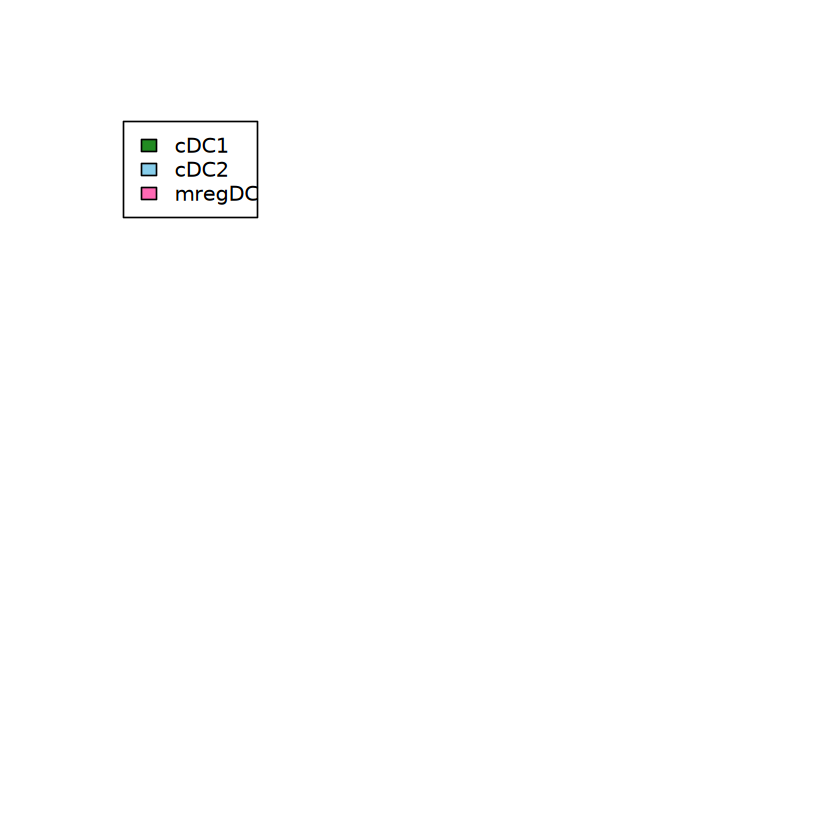

In [16]:
# Color to assign to the variables (same format as for NMF::aheatmap)
colVars <- list(NR_annotations_simple=c("cDC1"="forestgreen", 
                           "cDC2"="skyblue", 
                           "mregDC"="hotpink")) 
colVars$NR_annotations_simple <- colVars$NR_annotations_simple[intersect(names(colVars$NR_annotations_simple), cellInfo$NR_annotations_simple)]
saveRDS(colVars, file="int/colVars.Rds")
plot.new(); legend(0,1, fill=colVars$NR_annotations_simple, legend=names(colVars$NR_annotations_simple))

## Initialise SCENIC settings

In [17]:
library(SCENIC)

ERROR: Error in library(SCENIC): there is no package called ‘SCENIC’
